In [1]:
import sys
print(sys.path)

['/Users/everwitt/Documents/Coding/Notebooks', '/Users/everwitt/.vscode/extensions/ms-toolsai.jupyter-2022.7.1102252217/pythonFiles', '/Users/everwitt/.vscode/extensions/ms-toolsai.jupyter-2022.7.1102252217/pythonFiles/lib/python', '/opt/homebrew/Caskroom/miniconda/base/envs/newenv/lib/python310.zip', '/opt/homebrew/Caskroom/miniconda/base/envs/newenv/lib/python3.10', '/opt/homebrew/Caskroom/miniconda/base/envs/newenv/lib/python3.10/lib-dynload', '', '/opt/homebrew/Caskroom/miniconda/base/envs/newenv/lib/python3.10/site-packages']


In [2]:
import yfinance as yf

# Initializing the Ticker object
JPM_ticker = yf.Ticker('JPM')

# Extracting the history
JP_Morgan_df = JPM_ticker.history(start='2020-01-01')

In [3]:
import plotly.express as px

# Creating line plot
fig = px.line(x=JP_Morgan_df.index, y=JP_Morgan_df['Close'])

# Updating layout
fig.update_layout(
    title='Close Prices',
    xaxis_title='Date',
    yaxis_title='Price',
    template='plotly_white',
    xaxis_rangeslider_visible=True
)

# Showing figure
fig.show()

In [4]:
JPM_ticker

yfinance.Ticker object <JPM>

In [5]:
import numpy as np

In [6]:
a = np.array([1,2,3,4,5])
b = np.array([2,3,7,8,9])

In [7]:
np.intersect1d(a, b)

array([2, 3])

In [8]:
# returns the indices of `a` whose values were in `b`. Find the intersection of arrays, then find the indices of the intersection
np.searchsorted(a, np.intersect1d(a, b))

array([1, 2])

In [9]:
np.in1d(a, b)

array([False,  True,  True, False, False])

In [10]:
np.in1d(b, a)

array([ True,  True, False, False, False])

In [11]:
a[np.in1d(a, b)]

array([2, 3])

In [12]:
b[np.in1d(b, a)]

array([2, 3])

In [13]:
np.in1d(a, b).nonzero()

(array([1, 2]),)

In [14]:
# how much more is a negative percent worth than a postitive percent?
# i.e. if you go down x% how much % do you need to recover?

In [15]:
pct_down = .1
loss = 1 - pct_down
pct_up = 1 / loss

In [16]:
import numpy as np
r = np.arange(.05, 1, .05)
r

array([0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55,
       0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95])

In [17]:
for pct_down in r:
    pct_up = (1 / pct_down) - 1
    print(f"{pct_down=:.2f}, {pct_up=:.2f}")

pct_down=0.05, pct_up=19.00
pct_down=0.10, pct_up=9.00
pct_down=0.15, pct_up=5.67
pct_down=0.20, pct_up=4.00
pct_down=0.25, pct_up=3.00
pct_down=0.30, pct_up=2.33
pct_down=0.35, pct_up=1.86
pct_down=0.40, pct_up=1.50
pct_down=0.45, pct_up=1.22
pct_down=0.50, pct_up=1.00
pct_down=0.55, pct_up=0.82
pct_down=0.60, pct_up=0.67
pct_down=0.65, pct_up=0.54
pct_down=0.70, pct_up=0.43
pct_down=0.75, pct_up=0.33
pct_down=0.80, pct_up=0.25
pct_down=0.85, pct_up=0.18
pct_down=0.90, pct_up=0.11
pct_down=0.95, pct_up=0.05


In [18]:
pct_down = .2
loss = 1 - .2
pct_up = 1 / loss - 1

In [19]:
print(pct_down, loss, pct_up)

0.2 0.8 0.25


In [20]:
def get_pct_up(pct_down, capital):
    loss = 1 - pct_down
    pct_up = 1 / loss - 1
    print(f"{pct_down:.2f}, {pct_up:.2f}")
    return pct_up

In [21]:
pct_up = []
for pct_down in r:
    pct_up.append(get_pct_up(pct_down, 1))
pct_up

0.05, 0.05
0.10, 0.11
0.15, 0.18
0.20, 0.25
0.25, 0.33
0.30, 0.43
0.35, 0.54
0.40, 0.67
0.45, 0.82
0.50, 1.00
0.55, 1.22
0.60, 1.50
0.65, 1.86
0.70, 2.33
0.75, 3.00
0.80, 4.00
0.85, 5.67
0.90, 9.00
0.95, 19.00


[0.05263157894736836,
 0.11111111111111116,
 0.17647058823529416,
 0.25,
 0.33333333333333326,
 0.4285714285714286,
 0.5384615384615388,
 0.6666666666666667,
 0.8181818181818181,
 1.0,
 1.2222222222222223,
 1.5000000000000004,
 1.857142857142858,
 2.333333333333334,
 3.0000000000000018,
 4.000000000000001,
 5.6666666666666705,
 9.000000000000014,
 19.00000000000003]

In [22]:
import matplotlib.pyplot as plt
pct_up = np.array(pct_up)

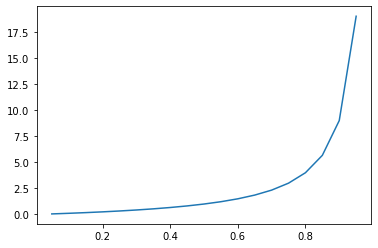

In [23]:
plt.plot(r, pct_up)
plt.show()

In [24]:
def get_pct_diff(neg_pct, pos_pct, capital=1):
    pct_down = 1 - neg_pct
    return (1 + pos_pct) / pct_down - 1

In [25]:
pct_down = np.arange(0.05, .71, .05)

In [26]:
pos_pct = 0.08
needed_pct = []
for pct in pct_down:
    needed_pct.append(get_pct_diff(pct, pos_pct))
needed_pct = np.array(needed_pct)

In [27]:
pct_down, needed_pct

(array([0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55,
        0.6 , 0.65, 0.7 ]),
 array([0.13684211, 0.2       , 0.27058824, 0.35      , 0.44      ,
        0.54285714, 0.66153846, 0.8       , 0.96363636, 1.16      ,
        1.4       , 1.7       , 2.08571429, 2.6       ]))

In [28]:
pct_diff = pct_down + pos_pct

In [29]:
pct_diff

array([0.13, 0.18, 0.23, 0.28, 0.33, 0.38, 0.43, 0.48, 0.53, 0.58, 0.63,
       0.68, 0.73, 0.78])

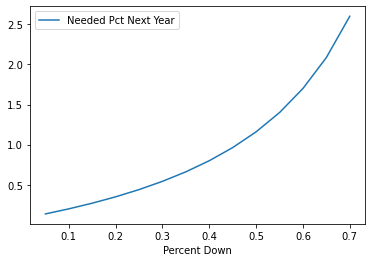

In [30]:
plt.plot(pct_down, needed_pct, label="Needed Pct Next Year")
# plt.plot(pct_down, pct_diff, label="Pct Diff This Year")
plt.xlabel("Percent Down")
# plt.ylabel("Percent Needed Recover Next Year")
plt.legend()
plt.show()